## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv(r"C:\Users\mites\Desktop\Ironhack\Week 2\Day 5\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv")

In [4]:
df = data.copy()
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1370545.35,816056.17,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.15,2.19,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,480.63,5944.12,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,89.24,345.61,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,25.90,240.48,0.0,0.00,0.00,0.00,50000.0


In [7]:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

In [8]:
crosstab_result = pd.crosstab(cat['category'], cat['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:
df[df['isBestSeller'] == True]


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
15,16,B09B97BPSW,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
17,18,B09B8XRZYB,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
36,37,B08L84ST93,Bose Solo Soundbar Series II - TV Speaker with...,4.6,2799,169.00,True,0,Hi-Fi Speakers
55,56,B08CMJ2YZX,"Sanyun SW208 3"" Active Bluetooth 5.0 Bookshelf...",4.4,974,59.49,True,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2434712,2815504,B07G72RGNX,TACVASEN Men's Waterproof Fleece Mountain Jack...,4.5,4928,61.99,True,0,Snowboards
2434953,2815751,B08F7P4374,TACVASEN Men's Waterproof Fleece Mountain Jack...,4.5,4928,61.99,True,0,Snowboards
2435202,2816076,B07SF7Y2XM,POLYTE Plush Quick Dry Lint Free Microfibre Ba...,4.4,3779,24.99,True,0,Bathroom Linen
2440120,2822184,B0841XR4TK,PRO-SPIN Table Tennis Bat With Pro Carbon Fibr...,4.6,3781,42.99,True,100,Table Tennis


In [10]:
best_seller_ratio = df.groupby('category')['isBestSeller'].mean(numeric_only=True).sort_values(ascending=False)
print(best_seller_ratio)



category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
                                    ...   
Bedding Collections               0.000000
CPUs                              0.000000
CD, Disc & Tape Players           0.000000
Blank Media Cases & Wallets       0.000000
eBook Readers & Accessories       0.000000
Name: isBestSeller, Length: 296, dtype: float64



3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


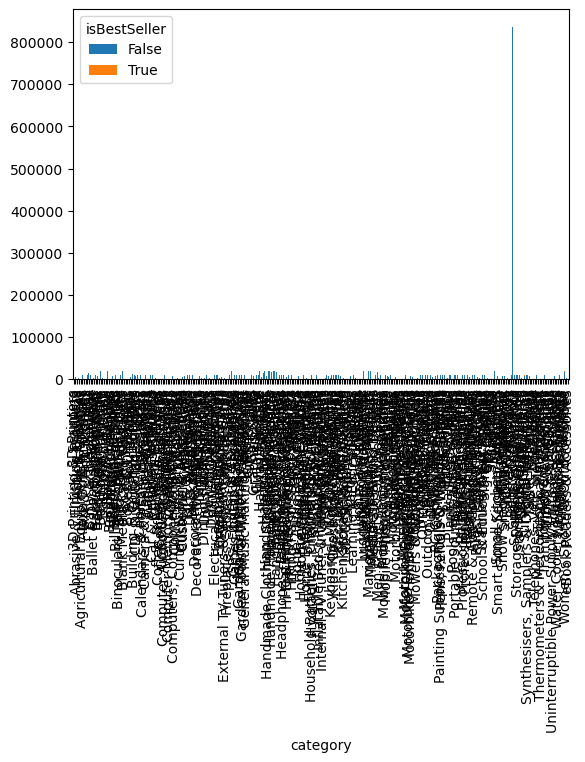

In [11]:
crosstab_result2 = pd.crosstab(cat['category'], cat['isBestSeller'])
crosstab_result2
crosstab_result2.plot(kind='bar', stacked=True)
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [12]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)


IQR: 36.0


In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(("lower_bound:", lower_bound), ("upper_bound:", upper_bound))

('lower_bound:', np.float64(-44.01)) ('upper_bound:', np.float64(99.99000000000001))


In [14]:
filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Original data shape:", df.shape)
print("Filtered data shape (without outliers):", filtered_df.shape)

Original data shape: (2443651, 9)
Filtered data shape (without outliers): (2115963, 9)


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [33]:
df_top_categories = df['category'].value_counts().head(20).index

In [34]:
df_top_categories 

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances', 'Handmade Gifts',
       'Handmade Home Décor', 'Luggage and travel gear', 'Handmade Jewellery',
       'Handmade Artwork', 'Women', 'Handmade Home & Kitchen Products',
       'Handmade Kitchen & Dining', 'Men', 'Baby'],
      dtype='object', name='category')

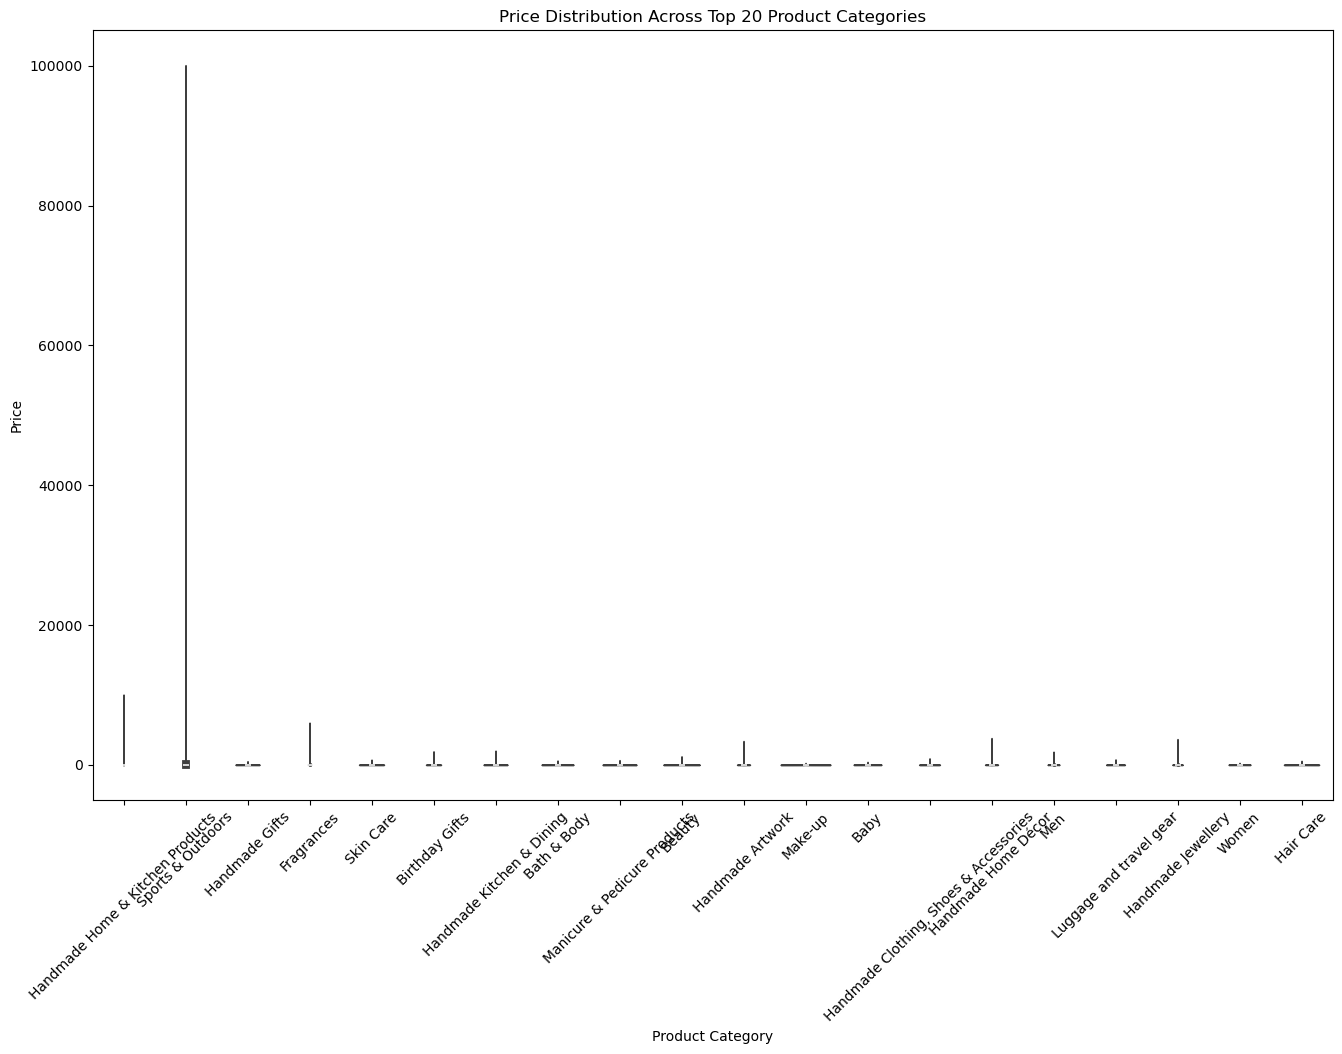

In [37]:
top20_categories = df['category'].value_counts().head(20).index
df_top20 = df[df['category'].isin(top20_categories)]

plt.figure(figsize=(16, 10))
sns.violinplot(x='category', y='price', data=df_top20)
plt.xticks(rotation=45)
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()


In [18]:


median_prices = df.groupby('category')['price'].median()

highest_median_category = median_prices.idxmax()
highest_median_value = median_prices.max()

print(f"The category with the highest median price is '{highest_median_category}' with a median price of {highest_median_value:.2f}")


The category with the highest median price is 'Laptops' with a median price of 1042.72


2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.


In [19]:
top_10_categories = df['category'].value_counts().head(10).index
top_10_df = df[df['category'].isin(top_10_categories)]


In [20]:
top_10_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


C:\Users\mites\AppData\Local\Temp\ipykernel_15372\652917195.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='price', data=top_10_df, estimator=sum, ci=None, palette='muted')
C:\Users\mites\AppData\Local\Temp\ipykernel_15372\652917195.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='price', data=top_10_df, estimator=sum, ci=None, palette='muted')


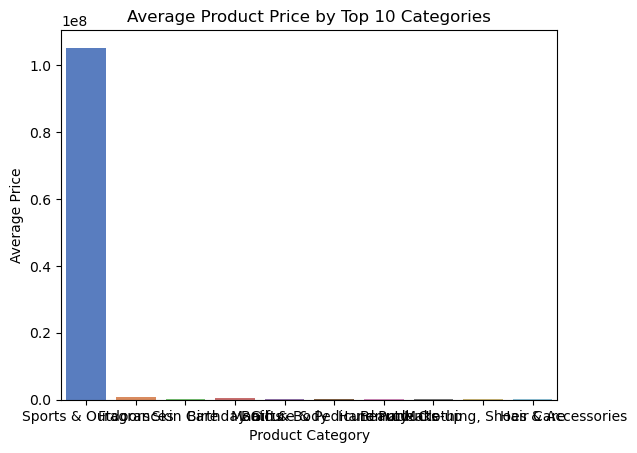

In [21]:

sns.barplot(x='category', y='price', data=top_10_df, estimator=sum, ci=None, palette='muted')
plt.title('Average Product Price by Top 10 Categories')
plt.ylabel('Average Price')
plt.xlabel('Product Category')
plt.show()

In [22]:
average_prices = df.groupby('category')['price'].mean()
highest_avg_category = average_prices.idxmax()
highest_avg_value = average_prices.max()
print(f"The category with the highest average price is '{highest_avg_category}' with an average price of {highest_avg_value:.2f}")


The category with the highest average price is 'Laptops' with an average price of 1087.99


3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [23]:
top_10_categories = df['category'].value_counts().head(10).index


top_10_df = df[df['category'].isin(top_10_categories)]

In [24]:
top_10_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


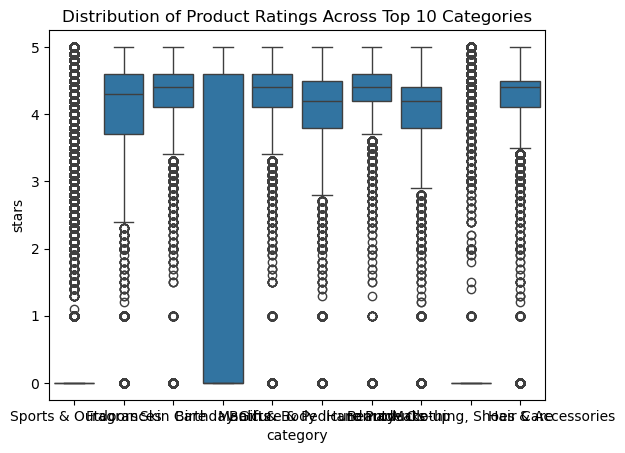

In [25]:

sns.boxplot(x='category', y='stars', data=top_10_df)

plt.title('Distribution of Product Ratings Across Top 10 Categories')

plt.show()

In [26]:
median_ratings = df.groupby('category')['stars'].median()
highest_median_category = median_ratings.idxmax()
highest_median_value = median_ratings.max()

print(f"The category with the highest median rating is '{highest_median_category}' with a median rating of {highest_median_value:.2f}")

The category with the highest median rating is 'Computer Memory' with a median rating of 4.70


2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


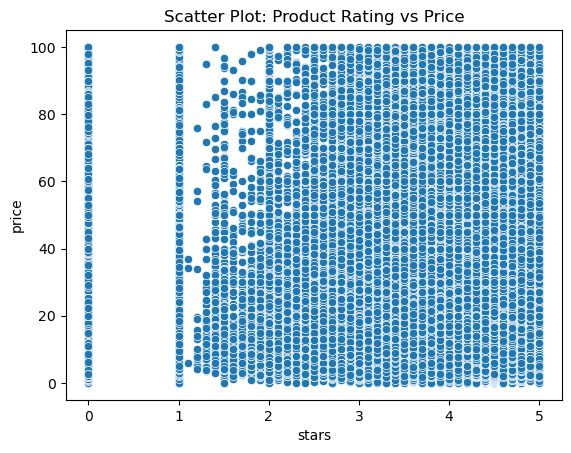

In [27]:

sns.scatterplot(x='stars', y='price', data=filtered_df)
plt.title('Scatter Plot: Product Rating vs Price')

plt.show()

#This scatter plot shows individual products, illustrating how prices vary with ratings.



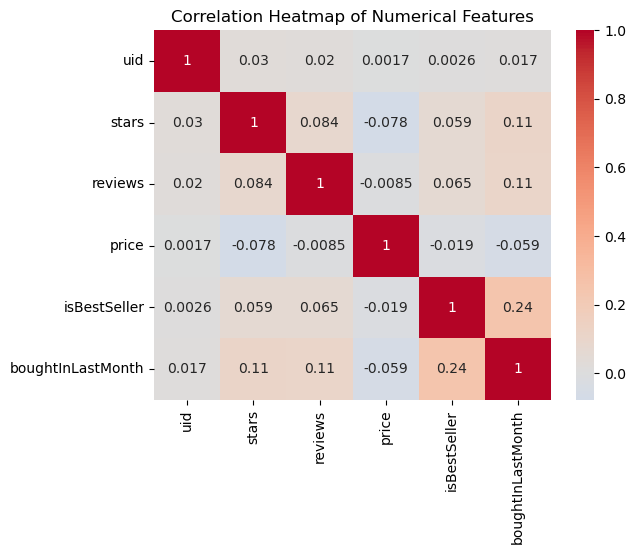

In [28]:
corr_matrix = filtered_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
#Displays correlation coefficients between variables like price, stars, and others.

#Helps identify which variables are strongly related.


In [29]:
import statsmodels.api as sm


In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
stats.probplot(filtered_df['price'], dist="norm", plot=plt)

((array([-4.97420488, -4.79954158, -4.70525502, ...,  4.70525502,
          4.79954158,  4.97420488]),
  array([ 0.  ,  0.  ,  0.  , ..., 99.99, 99.99, 99.99])),
 (np.float64(18.504525916746562),
  np.float64(23.408269686190174),
  np.float64(0.9020702992645517)))

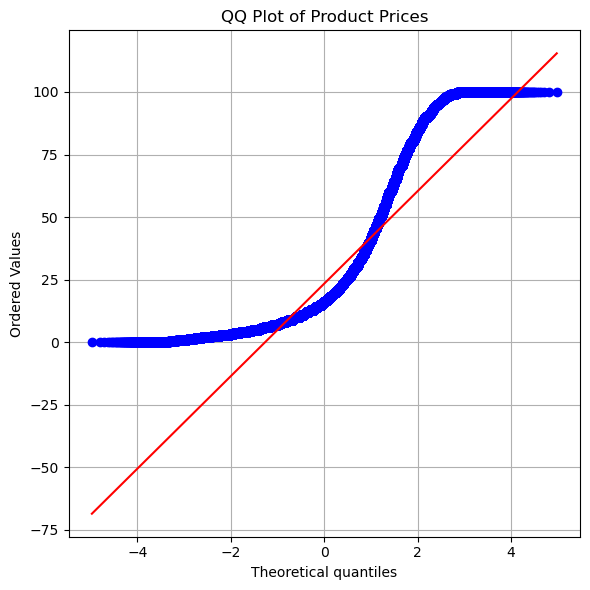

In [31]:
plt.title("QQ Plot of Product Prices")
plt.grid(True)
plt.tight_layout()
plt.show()